# Logistic Regression: Multiclass Classification

In this tutorial we will see how to use logistic regression for multiclass classification.

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.


In [2]:
digits.data[0]     #printing first sample out of 1797

#data of 0

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

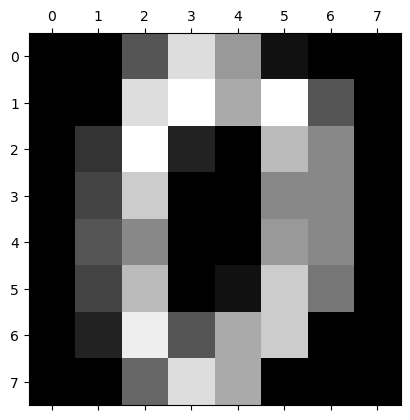

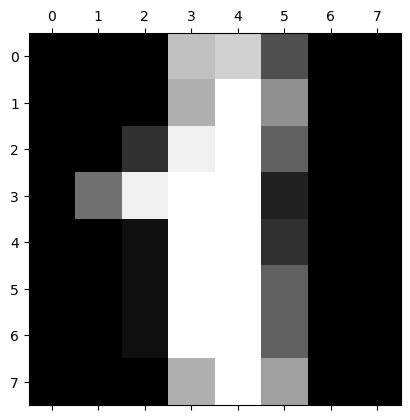

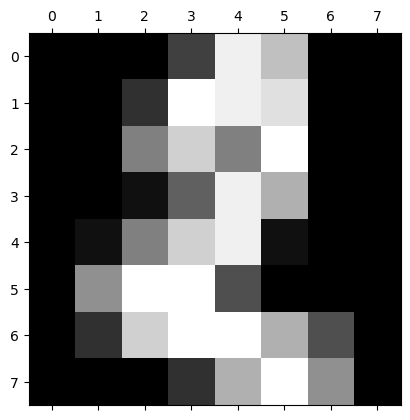

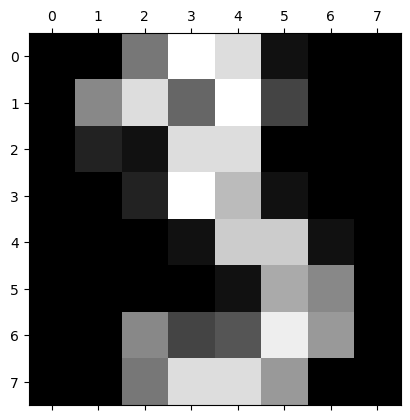

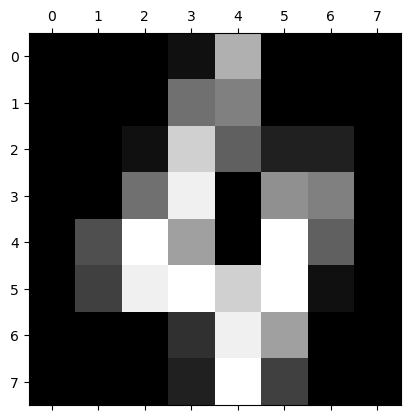

In [5]:
#to print first five sample
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 



In [6]:
dir(digits)   #The dir() function in Python is used to get a list of names in the current local scope or a specified object's attributes. 

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

### Create and train logistic regression model

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [10]:

model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Measure accuracy of our model

In [11]:
model.score(X_test, y_test)

#using xtest it calculates the y_predicted value and compares this y_predicted value with y_test

0.9638888888888889

In [12]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### Confusion Matrix - visualizing how well our model is doing


it is used to check where our model lost accuray, since 96% is accuracy ,where did it lose 4% accuracy is seen by using confusion matrix

In [13]:
y_predicted = model.predict(X_test)  #we get predicted value for x_test

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[30,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 35,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  4,  0,  0,  1,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 20]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

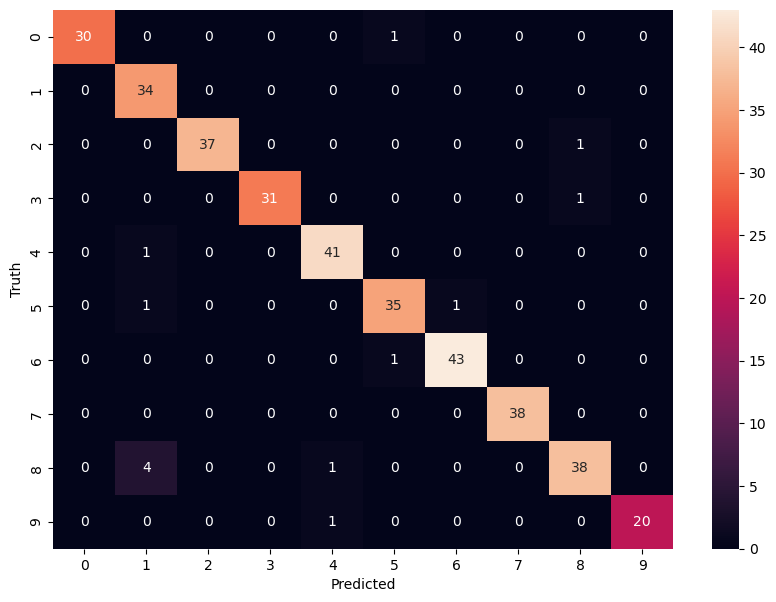

In [15]:
#visualizing above by using mathplotlib
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**it means 30 times the truth was 0**

**4 times truth was 8, it means for the model we said the image of 8 , but our model predicted and told no it is 1**

